In [1]:
!pip install pythainlp[full] 
!pip install pandas 
!pip install epitran
!pip install sklearn_crfsuite
!pip install tensorflow deepcut
!pip install attacut

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 3.8 MB/s 
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
     |████████████████████████████████| 160 kB 94.7 MB/s 
     |████████████████████████████████| 4.2 MB 64.0 MB/s 
     |████████████████████████████████| 880 kB 65.4 MB/s 
     |████████████████████████████████| 8.7 MB 26.5 MB/s 
     |████████████████████████████████| 47.5 MB 1.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.7 MB 69.9 MB/s 
     |████████████████████████████████| 1.5 MB 57.5 MB/s 
     |████████████████████████████████| 596 kB 89.9 MB/s 
     |████████████████████████████████| 1.5 MB 51.5 MB/s 
     |████████████████████████████████| 18.4 MB 23.1 MB/s 
     |████████████████████████████████| 1.5 MB 60.7 MB/s 
     |██████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd 
data = pd.read_csv('/content/teamchadchart.csv')
data

,type,organization,comment,coords,photo,address,district,subdistrict,province,timestamp
0,ความปลอดภัย,เพื่อนชัชชาติ,ตลาดนัดตรงข้ามวัดเสมียนนารี ที่มาบุกรุกที่เขตร...,"[100.556171,13.839094]",https://storage.googleapis.com/traffy_public_b...,32 ถ. กำแพงเพชร 6 แขวง ลาดยาว เขตจตุจักร กรุงเ...,จตุจักร,ลาดยาว,กรุงเทพมหานคร,2022-06-03 12:18:03.796195+00
1,ความปลอดภัย,เพื่อนชัชชาติ,1.ซอย เพชรเกษม 82 ตรงปากซอยจากทางลง mrt ปากซอย...,"[100.409454032779,13.7112724363614]",https://storage.googleapis.com/traffy_public_b...,37/55 เพชรเกษม 34 แขวง บางแคเหนือ เขตบางแค กรุ...,บางแค,บางแคเหนือ,กรุงเทพมหานคร,2022-06-03 12:15:53.832124+00
2,อื่นๆ,เพื่อนชัชชาติ,แจ้งเรื่องถนนครับ เนื่องจากมีการเจาะพื้นถนนเพื...,"[100.614642,13.77098]",https://storage.googleapis.com/traffy_public_b...,989 ถ. อินทราภรณ์ แขวง พลับพลา เขตวังทองหลาง ก...,วังทองหลาง,พลับพลา,กรุงเทพมหานคร,2022-06-03 12:15:32.082631+00
3,อื่นๆ,เพื่อนชัชชาติ,แจ้งปัญหาทางเท้าชำรุด กองขยะบนทางเท้า และรถจัก...,"[100.839344076812,13.8546655327354]",https://storage.googleapis.com/traffy_public_b...,70/1 ถนน เลียบวารี แขวง โคกแฝด เขต หนองจอก กรุ...,หนองจอก,โคกแฝด,กรุงเทพมหานคร,2022-06-03 12:15:14.015176+00
4,ความปลอดภัย,เพื่อนชัชชาติ,ซอย เย็นอากาศ 2 แยก 8 ได้ขอไฟถนนไปเพิ่ม เพราะม...,"[100.548027008772,13.7121245225138]",https://storage.googleapis.com/traffy_public_b...,178 ซอย เย็นอากาศ 2 แยก 8 แขวง ช่องนนทรี เขต ย...,ยานนาวา,ช่องนนทรี,กรุงเทพมหานคร,2022-06-03 12:14:50.764777+00
...,...,...,...,...,...,...,...,...,...,...
6470,อื่นๆ,เพื่อนชัชชาติ,NaN,"[100.542044773125,13.7107793363401]",https://storage.googleapis.com/traffy_public_b...,ถนนเย็นอากาศ สาทร,ยานนาวา,ช่องนนทรี,กรุงเทพมหานคร,2021-09-01 09:33:34.304352+00
6471,อื่นๆ,เพื่อนชัชชาติ,NaN,"[100.550893121724,13.7886542313931]",https://storage.googleapis.com/traffy_public_b...,ถนนจันทน์ สาทร,พญาไท,สามเสนใน,กรุงเทพมหานคร,2021-09-01 09:33:32.434846+00
6472,อื่นๆ,เพื่อนชัชชาติ,NaN,"[100.623943681791,13.9434269410406]",https://storage.googleapis.com/traffy_public_b...,รพ.บีแคร์ สายไหม,สายไหม,สายไหม,กรุงเทพมหานคร,2021-09-01 09:33:30.677133+00
6473,อื่นๆ,เพื่อนชัชชาติ,NaN,"[100.475121821806,13.6999172528007]",https://storage.googleapis.com/traffy_public_b...,หมู่บ้านเชาวลิตค่ะ ซอยจอมทอง 12 แขวงบางค้อ เขต...,จอมทอง,บางค้อ,กรุงเทพมหานคร,2021-09-01 09:33:28.964543+00


In [3]:
data.isnull().sum()

type              0
organization      0
comment         166
coords            0
photo             0
address           0
district        566
subdistrict     567
province          1
timestamp         0
dtype: int64

In [4]:
datas = data.dropna()

In [5]:
datas.comment

0       ตลาดนัดตรงข้ามวัดเสมียนนารี ที่มาบุกรุกที่เขตร...
1       1.ซอย เพชรเกษม 82 ตรงปากซอยจากทางลง mrt ปากซอย...
2       แจ้งเรื่องถนนครับ เนื่องจากมีการเจาะพื้นถนนเพื...
3       แจ้งปัญหาทางเท้าชำรุด กองขยะบนทางเท้า และรถจัก...
4       ซอย เย็นอากาศ 2 แยก 8 ได้ขอไฟถนนไปเพิ่ม เพราะม...
                              ...                        
6433         ไม่เคยท่วม แต่หลังๆ มาฝนตกนิดเดียวก็ท่วมง่าย
6460    น้ำในคลองประเวศน์ฯ สูงเมื่อไหร่ ซอยนี้จะท่วมทันที
6464    จุดเสี่ยงน้ำท่วม จุดเฝ้าระวัง กรณีเขตยกเครื่อง...
6467    มีน้ำท่วมบ้าง เพราะพื้นถนนสูงกว่าถนนวิภาวดี ปร...
6474    ขาดการจัดการขยะที่มีประสิทธิภาพ ส่งผลให้เกิดกา...
Name: comment, Length: 5743, dtype: object

<h1>Tokenize

In [6]:
from pythainlp import word_tokenize

text = datas.comment[0]
tokenized_text = word_tokenize(text, engine='deepcut')
print(tokenized_text)

def tokenizes(s):
  s_cut = ''
  s_cut = word_tokenize(s)
  return s_cut

['ตลาด', 'นัด', 'ตรงข้าม', 'วัดเสมียนนารี', ' ', 'ที่', 'มา', 'บุกรุก', 'ที่', 'เขต', 'ราง', 'รถไฟ', ' ', 'เป็น', 'ตลาด', 'ที่', 'ไม่', 'สะอาด', ' ', 'และ', 'อันตราย', 'ต่อ', 'คน', 'ที่', 'มา', 'ตลาด', ' ', 'เพราะ', 'ต้อง', 'เดิน', 'ข้าม', 'ถนน', 'มา', 'ข้าม', 'ทาง', 'รถไฟ', ' ', 'หลาย', 'ครั้ง', 'รถไฟ', 'จะ', 'ชน', 'คน', 'เสีย', 'ชีวิต', 'มา', 'แล้ว', ' ', 'กทม.', 'อาจ', 'ช่วย', 'เป็น', 'เจ้าภาพ', ' ', 'หา', 'ที่', 'รองรับ', 'ให้', 'ไป', 'ขาย', 'ที่', 'ตลาด', 'ถูก', 'กฎหมาย', 'โดย', 'สำนักตลาดช่วย', ' ', 'เช่น', ' ', 'ประชานิเวศน์', 'ใกล้', 'ๆ', ' ', 'หรือ', 'วิธี', 'อื่น', ' ', 'ที่', 'ยกเลิก', 'ตลาด', 'ตรง', 'นี้', 'ได้', ' ', '(', 'จาก', 'ภาพ', 'ใช้', 'บันได', 'นี้', 'ปีน', 'ไป', 'ตลาด', ' ', 'มี', 'ตลาด', 'ช่วง', 'เย็น', 'แทบ', 'ทุก', 'วัน', ')']


<h1>Clean Text

In [7]:
import re
import string
from pythainlp.corpus.common import thai_stopwords

def clean_text(txt): 
    
    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    txt = re.sub(r'<.@*?!>','', txt)
    
    # ลบ hashtag
    txt = re.sub(r'#','',txt)

    # ลบ ตัวเลขออก
    txt = re.sub(r'[0-9]+', '', txt)

    txt = re.sub(r'http\S+', '', txt)
    txt = re.sub(r'https\S+', '', txt)

    
    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        txt = re.sub(r'\{}'.format(c),'',txt)
    
    # ลบ separator เช่น \n \t
    txt = ' '.join(txt.split())
      
    return txt

<h1>Clear Stopword

In [8]:
from pythainlp.corpus.common import thai_stopwords

# print(thai_stopwords(),"\n\n")
def rm_stw(txt):
  rm_stw_txt =""
  for i in txt:
    if i not in thai_stopwords():
      rm_stw_txt = rm_stw_txt+i
  return rm_stw_txt
      
tokenized_txt = word_tokenize(clean_text(datas.comment[0]))
print(tokenized_txt)
print(rm_stw(tokenized_txt))
print(len(tokenized_txt))
print(len(rm_stw(tokenized_txt)))

['ตลาดนัด', 'ตรงข้าม', 'วัด', 'เสมียน', 'นารี', ' ', 'ที่มา', 'บุกรุก', 'ที่', 'เขต', 'รางรถไฟ', ' ', 'เป็น', 'ตลาด', 'ที่', 'ไม่', 'สะอาด', ' ', 'และ', 'อันตราย', 'ต่อ', 'คน', 'ที่มา', 'ตลาด', ' ', 'เพราะ', 'ต้อง', 'เดิน', 'ข้ามถนน', 'มา', 'ข้าม', 'ทางรถไฟ', ' ', 'หลายครั้ง', 'รถไฟ', 'จะ', 'ชน', 'คน', 'เสียชีวิต', 'มา', 'แล้ว', ' ', 'กทม', 'อาจ', 'ช่วย', 'เป็นเจ้าภาพ', ' ', 'หา', 'ที่', 'รองรับ', 'ให้', 'ไป', 'ขาย', 'ที่', 'ตลาด', 'ถูกกฎหมาย', 'โดย', 'สำนัก', 'ตลาด', 'ช่วย', ' ', 'เช่น', ' ', 'ประชา', 'นิเวศน์', 'ใกล้', 'ๆ', ' ', 'หรือ', 'วิธี', 'อื่น', ' ', 'ที่', 'ยกเลิก', 'ตลาด', 'ตรงนี้', 'ได้', ' ', 'จาก', 'ภาพ', 'ใช้', 'บันได', 'นี้', 'ปีน', 'ไป', 'ตลาด', ' ', 'มี', 'ตลาด', 'ช่วง', 'เย็น', 'แทบ', 'ทุกวัน']
ตลาดนัดตรงข้ามวัดเสมียนนารี ที่มาบุกรุกเขตรางรถไฟ ตลาดสะอาด อันตรายคนที่มาตลาด เดินข้ามถนนข้ามทางรถไฟ หลายครั้งรถไฟชนคนเสียชีวิต กทมเป็นเจ้าภาพ หารองรับขายตลาดถูกกฎหมายสำนักตลาด  ประชานิเวศน์ วิธี ยกเลิกตลาดตรงนี้ ภาพบันไดปีนตลาด ตลาดเย็นแทบ
93
241


<h1>Text Normalization

In [9]:
import re

from pythainlp import thai_tonemarks

_NORMALIZE_RULE1 = [
    "ะ",
    "ั",
    "็",
    "า",
    "ิ",
    "ี",
    "ึ",
    "่",
    "ํ",
    "ุ",
    "ู",
    "ใ",
    "ไ",
    "โ",
    "ื",
    "่",
    "้",
    "๋",
    "๊",
    "ึ",
    "์",
    "๋",
    "ำ",
]  # เก็บพวกสระ วรรณยุกต์ที่ซ้ำกันแล้วมีปัญหา


_NORMALIZE_RULE2 = [
    ("เเ", "แ"),  # เ เ -> แ
    ("ํ(t)า", "\\1ำ"),
    ("ํา(t)", "\\1ำ"),
    ("([่-๋])([ัิ-ื])", "\\2\\1"),
    ("([่-๋])([ูุ])", "\\2\\1"),
    ("ำ([่-๋])", "\\1ำ"),
    ("(์)([ัิ-ู])", "\\2\\1"),
]  # เก็บพวก พิมพ์ลำดับผิดหรือผิดแป้นแต่กลับแสดงผลถูกต้อง ให้ไปเป็นแป้นที่ถูกต้อง เช่น เ + เ ไปเป็น แ



def normalize(text: str) -> str:
    """
    Thai text normalize

    :param str text: thai text
    :return: thai text
    **Example**::
     >>> print(normalize("เเปลก")=="แปลก") # เ เ ป ล ก กับ แปลก
     True
    """
    for data in _NORMALIZE_RULE2:
        text = re.sub(data[0].replace("t", "[่้๊๋]"), data[1], text)
    for data in list(zip(_NORMALIZE_RULE1, _NORMALIZE_RULE1)):
        text = re.sub(data[0].replace("t", "[่้๊๋]") + "+", data[1], text)
    return text

In [10]:
unnormalized_text = datas.comment[0]
print(datas.comment[0])
print( normalize(unnormalized_text))

ตลาดนัดตรงข้ามวัดเสมียนนารี ที่มาบุกรุกที่เขตรางรถไฟ เป็นตลาดที่ไม่สะอาด และอันตรายต่อคนที่มาตลาด เพราะต้องเดินข้ามถนนมาข้ามทางรถไฟ หลายครั้งรถไฟจะชนคนเสียชีวิตมาแล้ว กทม.อาจช่วยเป็นเจ้าภาพ หาที่รองรับให้ไปขายที่ตลาดถูกกฎหมายโดยสำนักตลาดช่วย เช่น ประชานิเวศน์ใกล้ๆ หรือวิธีอื่น ที่ยกเลิกตลาดตรงนี้ได้ (จากภาพใช้บันไดนี้ปีนไปตลาด มีตลาดช่วงเย็นแทบทุกวัน)
ตลาดนัดตรงข้ามวัดเสมียนนารี ที่มาบุกรุกที่เขตรางรถไฟ เป็นตลาดที่ไม่สะอาด และอันตรายต่อคนที่มาตลาด เพราะต้องเดินข้ามถนนมาข้ามทางรถไฟ หลายครั้งรถไฟจะชนคนเสียชีวิตมาแล้ว กทม.อาจช่วยเป็นเจ้าภาพ หาที่รองรับให้ไปขายที่ตลาดถูกกฎหมายโดยสำนักตลาดช่วย เช่น ประชานิเวศน์ใกล้ๆ หรือวิธีอื่น ที่ยกเลิกตลาดตรงนี้ได้ (จากภาพใช้บันไดนี้ปีนไปตลาด มีตลาดช่วงเย็นแทบทุกวัน)


<h1>Spelling Correct

In [11]:
import pythainlp 
misspell_text = 'ธนคาร'

print(pythainlp.spell(misspell_text))
print(pythainlp.correct(misspell_text))

def spell(s):
  st=""
  st = pythainlp.correct(s)
  return st 

['ธนาคาร', 'ธนสาร']
ธนาคาร


In [12]:
data_train = datas.comment[0:5000]

In [13]:
data_train

0       ตลาดนัดตรงข้ามวัดเสมียนนารี ที่มาบุกรุกที่เขตร...
1       1.ซอย เพชรเกษม 82 ตรงปากซอยจากทางลง mrt ปากซอย...
2       แจ้งเรื่องถนนครับ เนื่องจากมีการเจาะพื้นถนนเพื...
3       แจ้งปัญหาทางเท้าชำรุด กองขยะบนทางเท้า และรถจัก...
4       ซอย เย็นอากาศ 2 แยก 8 ได้ขอไฟถนนไปเพิ่ม เพราะม...
                              ...                        
4995           ภาพน้ำท่วมปีที่แล้วที่ไม่ใช่น้ำท่วมใหญ่ค่ะ
4996    คลองทางเข้าหมู่บ้านนันทิศา ซอยคู้บอน30 คลองสาม...
4997    ขอแจ้งปัญหาที่อยากแก้ไขในพื้นที่เขตทุ่งครุของเ...
4998    ถนนสุเหร่าคลองหนึ่ง ตั้งแต่แยกลำกะโหลก - แยกถน...
4999                     น้ำจะวิ่งมาจากแบริ่ง ไปทาง ลาซาล
Name: comment, Length: 5000, dtype: object

In [ ]:
################################### Ram Toom!!!!!

In [14]:

data_train = data_train.apply(clean_text).copy()
data_train = data_train.apply(normalize).copy()
# data_train = data_train.apply(spell).copy()
# data_train = data_train.apply(tokenizes).copy()
data_train = data_train.apply(rm_stw).copy()

data_train

0       ตลาดนัดตรงข้ามวัดเสมียนนารี ที่มาบุกรุกที่เขตร...
1       ซอย เพชรเกษม ตรงปากซอยจากทางลง mrt ปากซอยมืดมา...
2       แจ้งเรื่องถนนครับ เนื่องจากมีการเจาะพื้นถนนเพื...
3       แจ้งปัญหาทางเท้าชำรุด กองขยะบนทางเท้า และรถจัก...
4       ซอย เย็นอากาศ แยก ได้ขอไฟถนนไปเพิ่ม เพราะมีหลา...
                              ...                        
4995           ภาพน้ำท่วมปีที่แล้วที่ไม่ใช่น้ำท่วมใหญ่ค่ะ
4996    คลองทางเข้าหมู่บ้านนันทิศา ซอยคู้บอน คลองสามวาค่ะ
4997    ขอแจ้งปัญหาที่อยากแก้ไขในพื้นที่เขตทุ่งครุของเ...
4998    ถนนสุเหร่าคลองหนึ่ง ตั้งแต่แยกลำกะโหลก แยกถนนห...
4999                     น้ำจะวิ่งมาจากแบริ่ง ไปทาง ลาซาล
Name: comment, Length: 5000, dtype: object

In [ ]:
##################################

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer = pythainlp.tokenize.word_tokenize,max_df=0.7,min_df=0.01)
tfidf_vec = tfidf.fit_transform(data_train).toarray()
tfidf_df = pd.DataFrame(tfidf_vec)
tfidf_vec.shape

(5000, 451)

In [ ]:
y = tfidf.get_feature_names()
y

In [ ]:
tfidf_df.columns = tfidf.vocabulary_.keys()
tfidf_df

,ตรงข้าม,วัด,ที่มา,ที่,เขต,เป็น,ตลาด,ไม่,และ,อันตราย,...,มุ่งหน้า,บ่อย,bts,ตัวเอง,ทางด่วน,ขาเข้า,สื่อสาร,รวมถึง,ตกหนัก,เขา
0,0.0,0.0,0.000000,0.089618,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.041948,0.0,0.0,0.0,0.0
1,0.0,0.0,0.235159,0.000000,0.0,0.000000,0.0,0.0,0.207067,0.0,...,0.293138,0.0,0.000000,0.000000,0.0,0.082718,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.152297,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.175005,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.111457,0.0,0.356545,0.176669,0.0,0.188708,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.147921,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.166202,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
data_train = pd.DataFrame(tfidf_df)

<h1> K-Mean

In [ ]:
#after 


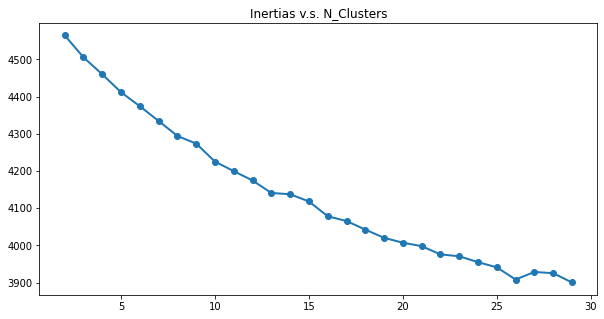

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np

inertias = []

for i in range(2,30):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data_train)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,30),inertias, marker='o', lw=2);

In [ ]:
km = KMeans(n_clusters=26, random_state=0)
clusters = km.fit_predict(data_train)
clusters

array([14,  0, 22, ..., 19, 15, 13], dtype=int32)

In [ ]:
len(clusters)

5000

In [ ]:
clusters = np.array(clusters)
clusters = np.reshape(clusters,(5000,1))
clusters

array([[14],
       [ 0],
       [22],
       ...,
       [19],
       [15],
       [13]], dtype=int32)

In [ ]:
data_final = datas.comment[0:5000]
data_finals = pd.DataFrame(data_final)
data_finals

,comment
0,ตลาดนัดตรงข้ามวัดเสมียนนารี ที่มาบุกรุกที่เขตร...
1,1.ซอย เพชรเกษม 82 ตรงปากซอยจากทางลง mrt ปากซอย...
2,แจ้งเรื่องถนนครับ เนื่องจากมีการเจาะพื้นถนนเพื...
3,แจ้งปัญหาทางเท้าชำรุด กองขยะบนทางเท้า และรถจัก...
4,ซอย เย็นอากาศ 2 แยก 8 ได้ขอไฟถนนไปเพิ่ม เพราะม...
...,...
4995,ภาพน้ำท่วมปีที่แล้วที่ไม่ใช่น้ำท่วมใหญ่ค่ะ
4996,คลองทางเข้าหมู่บ้านนันทิศา ซอยคู้บอน30 คลองสาม...
4997,ขอแจ้งปัญหาที่อยากแก้ไขในพื้นที่เขตทุ่งครุของเ...
4998,ถนนสุเหร่าคลองหนึ่ง ตั้งแต่แยกลำกะโหลก - แยกถน...


In [ ]:
data_finals['cluster'] = clusters
data_finals = pd.DataFrame(data_finals)

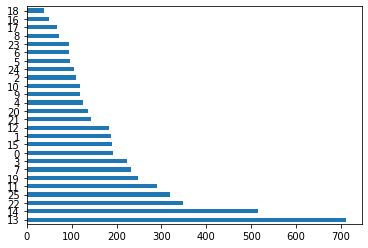

In [ ]:
data_finals.cluster.value_counts().plot.barh()
plt.show()

In [ ]:
data_finals

,comment,cluster
0,ตลาดนัดตรงข้ามวัดเสมียนนารี ที่มาบุกรุกที่เขตร...,14
1,1.ซอย เพชรเกษม 82 ตรงปากซอยจากทางลง mrt ปากซอย...,0
2,แจ้งเรื่องถนนครับ เนื่องจากมีการเจาะพื้นถนนเพื...,22
3,แจ้งปัญหาทางเท้าชำรุด กองขยะบนทางเท้า และรถจัก...,12
4,ซอย เย็นอากาศ 2 แยก 8 ได้ขอไฟถนนไปเพิ่ม เพราะม...,14
...,...,...
4995,ภาพน้ำท่วมปีที่แล้วที่ไม่ใช่น้ำท่วมใหญ่ค่ะ,20
4996,คลองทางเข้าหมู่บ้านนันทิศา ซอยคู้บอน30 คลองสาม...,4
4997,ขอแจ้งปัญหาที่อยากแก้ไขในพื้นที่เขตทุ่งครุของเ...,19
4998,ถนนสุเหร่าคลองหนึ่ง ตั้งแต่แยกลำกะโหลก - แยกถน...,15


In [ ]:
data1 = data_finals.comment[data_finals['cluster']==0]
data1 = pd.DataFrame(data1)
data1

,comment
1,1.ซอย เพชรเกษม 82 ตรงปากซอยจากทางลง mrt ปากซอย...
5,ซอย เพชรเกษม 82 ตรงปากซอยจากทางลง mrt ปากซอยมื...
6,ซอย เพชรเกษม 82 ตรงปากซอยจากทางลง mrt ปากซอยมื...
25,ไม่มีไฟส่องสว่างบนทางเดิน
96,แจ้งปัญหาแยกท่าพระฝั่งถนนเพชรเกษมตั้งแต่ปลายทา...
...,...
4833,แจ้งมาซ่อมสะพานข้ามระหว่างชุมชนบ้านกล้วยกับทาง...
4882,ปากซอยจันทน์ 32 ไฟไม่มีนานแล้ว
4883,ปากซอยจันทน์ 32 ไฟไม่มีนานแล้ว
4899,1.) ไม่มีไฟส่องสว่างที่ถนนกำแพงเพชร6 หน้าบ้านก...


In [ ]:
# 0  ไฟส่องสว่างม่เพียงพอ , ไฟเสีย  , ขอไฟ , ไฟสัญญาณจราจรไม่มี
# 1  ทางเท้า , ทางสัญจรไปมาลำบากหรืออันตราย , ไม่มีที่หลบฝน , มีสิ่งกีดขวางหรือคนเร่ร่อนในทางสัญจร 
# 2  พื้นที่สาธารณะ วัตถุหรือสิ่งของหรือรถสาธารณะ
# 3  ที่จอดรถ การจอดรถ มอไซบนทางเดินรถ 
# 4  น้ำเน่าเสีย ขยะ คลอง (ประโยคที่มีคำว่าคลอง)
# 5  ปัญหาเกี่ยวกับการแจ้งเรื่องต่างๆ (ประโยคที่มีคำว่าแจ้ง)
# 6  สายไฟ เสาไฟฟ้า 
# 7  ขยะ กลิ่นเหม็น จุดทิ้งขยะ การทิ้งขยะ 
# 8  เสาไฟ (ประโยคส่วนใหญ่มีคำว่า เสา )
# 9  ถนน 
# 10 ฝาท่อ นำ้เอ่อล้น ท่อระบายน้ำ 
# 11 - 
# 12 ทางเท้า (แบบประโยคสั้นๆ)
# 13 - 
# 14 ประโยคที่ยาวมากๆๆๆๆๆๆๆๆๆๆๆๆๆๆๆๆ
# 15 ถนน 
# 16 จราจร
# 17 ส่วนมากเป็นประโยคบอกเล่าหรือคำถาม 
# 18 คำขอบคุณ 
# 19 ซอย ถนน พิกัด เขต 
# 20 นำ้ท่วม 
# 21 ฟุตบาท 
# 22 -
# 23 ทางม้าลาย สี่แยก 
# 24 รถติด การจราจรติดขัด 
# 25 - 

In [ ]:
all_str = []
for i in data_finals.comment[data_finals['cluster']==1].index:
  all_str.append(data_finals.comment[i])
all_str

['ทางเท้าถูกเอาก้อนอิฐออกน่าจะทำให้น้ำไหลดีขึ้นแต่เป็นอันตรายเวลาคนเดินเพราะติดกับโรบินสัน ลาดกระบัง',
 'ทางเท้าบริเวณปากซอยประชาราษฎ์บำเพ็ญ 1 เดินไม่สะดวกเลยค่ะ พื้นที่ทางเท้าแคบมากอยู่แล้ว มีทั้งเสาไฟ ป้ายต่าง ๆ และในช่วงกลางคืนยังมีร้านค้า ขอทาน ประชาชนไม่สามารถเดินสวนกันบนทางเท้าได้ ทำให้ต้องเดินบนถนนค่ะ',
 'ซอย นวมินทร์ 88 มีการจอดรถขวางการจราจรหลายคัน ซึ่งเซ็นทางนี้เป็นทางลัดไป รามอินทราได้ ทำให้การจราจรติดขัด คนเดินทางเท้า ต้องเดินบนถนน แทนที่จะเดินริมได้',
 'มีคนจรจัดนอนที่ริมฟุตบาทมานานเป็นเดือน โดยที่บางทีเกือบจะไม่มีทางเดิน ต้องลงมาเดินที่ถนนเลยค่ะ',
 'แคมป์ก่อสร้างบริเวณนี้กินพื้นที่ทางเท้าไม่สามารถเดินได้ ต้องลงไปเดินด้านล่างค่ะ',
 'แคมป์ก่อสร้างบริเวณนี้กินพื้นที่ทางเท้าไม่สามารถเดินได้ ต้องลงไปเดินด้านล่างค่ะ',
 'สะพานลอยหน้ารพ.บางมด หน้าตลาดสินทวี คับแคบ ชำรุด คนป่วยคนท้องคนพิการเดินข้ามไม่สะดวก คนเดียวก็เต็มความกว้างบันไดแล้ว เวลาเช้าเย็นมีนักเรียน คนทำงาน คนแก่ ทั้งมาโรงพยาบาล มาตลาดมากมายแต่ไม่สะดวกมากแต่ว่าไม่มีทางเลือก',
 'ทางเท้าระหว่างลาดพร้าว 40 กับ 42 มีไซต์ก่อ

In [ ]:
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud

regexp = r"[ก-๙a-zA-Z']+"


def get_text_str(message):
  tokenized =" "
  th_stw = thai_stopwords()
  for i in message:
    token = word_tokenize(i)
    for j in token:
      if j not in thai_stopwords():
        tokenized =tokenized + " " + j
  
  return tokenized


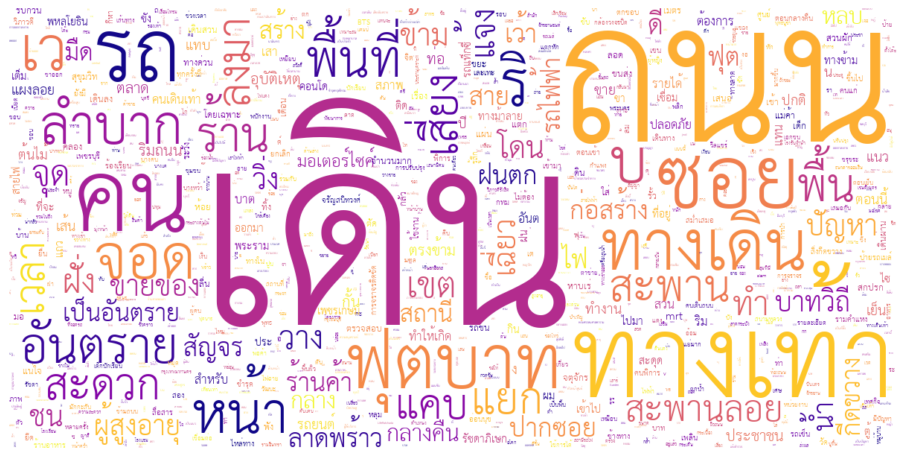

In [ ]:
text1 = get_text_str(data_finals.comment[data_finals['cluster']==1])

path = '/content/THSarabunNew.ttf'
wordcloud = WordCloud(
                      font_path=path, 
                      min_font_size=1,
                      background_color="white",
                      width=400,
                      height=200,
                      max_words=1000, 
                      colormap='plasma', 
                      scale=3,
                      font_step=4,
                    #   contour_width=3, 
                      contour_color='steelblue', 
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(text1)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [15]:
########################################## Problem 

# 1. ประโยคที่ยาวมากๆ ยากจะจับใจความได้ว่าอยู่ในเรื่องไหน โมเดลจึงเอาไปกองรวมกันไว้เป็น cluster เดียวกัน 
# 2. ยังไม่สามารถเข้าถึง intent ของประโยคได้ 
# 3. บางประโยค มีหลายเรื่องที่เกี่ยวข้อง 

<h1> LDA

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

no_features = 2100
tf_vector = CountVectorizer(tokenizer = pythainlp.tokenize.word_tokenize,max_df=0.95,min_df=0.02,max_features=no_features)
tf = tf_vector.fit_transform(data_train)
tf

<5000x225 sparse matrix of type '<class 'numpy.int64'>'
	with 70466 stored elements in Compressed Sparse Row format>

In [ ]:
tf_feature_name = tf_vector.get_feature_names()
tf_feature_name

In [113]:
from sklearn.decomposition import NMF , LatentDirichletAllocation 

no_topics = 24

lda = LatentDirichletAllocation(n_components=no_topics, max_iter=21, learning_method='online',learning_offset=50).fit(tf)


In [114]:
def display_topic(model, feature_names , no_top_words):
  for topic_idx , topic in enumerate(model.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topic(lda,tf_feature_name,no_top_words)

Topic 0:
มา ไม่ แล้ว มี นาน ปี หลาย ทางม้าลาย มาก ขับ
Topic 1:
  รถ จอด ทำให้ เดิน ถนน มี ซอย และ เลน
Topic 2:
  มี และ ที่ ไม่ การ มา ได้ ใน ให้
Topic 3:
ใหม่ ต้นไม้ ตัด ออก ถึง สูง และ ให้   มาก
Topic 4:
ให้ อยาก ช่วย ค่ะ เรื่อง หมู่บ้าน ที่ ส่ง หน่อย หรือ
Topic 5:
สวน พื้นที่ ระ สา ธา นำ การ ใน รบกวน ก่อสร้าง
Topic 6:
ทางเดิน พื้น ร้าน ตั้ง คะ กับ ขวาง วาง บน มี
Topic 7:
  ขยะ มา มี ทิ้ง ไม่ เก็บ การ และ ทำ
Topic 8:
สาย สัญญา ลงมา ที่ ตาม แบบ   มี ต้อง ฝาก
Topic 9:
  ไม่ ก็ ไป จะ ได้ แต่ มี คน เลย
Topic 10:
  ไฟ มี ไม่ เสา ส่องสว่าง มืด ติด ซอย ดับ
Topic 11:
ป้าย รอ จราจร ป้ายรถเมล์ จุด ใกล้ ที่ พื้น รถ จอด
Topic 12:
คุ ค่ะ พระราม ขอบ นะคะ ด้วย ขอ พระ อย่าง หลัง
Topic 13:
สะพาน ข้าม ฝั่ง อุบัติเหตุ สายไฟ แยก เกิด สะพานลอย   ใต้
Topic 14:
ฟุตบาท ชำรุด พัง แก้ไข ได้รับ ใกล้ จะ แล้ว พื้น ครับ
Topic 15:
บาง เยอะ มาก วัด แถว ตรงข้าม ชุมชน เหม็น ฝั่ง ปัญหา
Topic 16:
ริ เว บ   น้ำท่วม น้ำ มี ขัง ไม่ ถนน
Topic 17:
  มาก ปากซอย ลำบาก สะพานลอย น้ำท่วม ข้าง เห็น พัง ฝน
Topic 18:
ก็ ค่ะ รถ ผม ฝ

In [115]:
doc_topic = lda.transform(tf)

In [116]:
len(doc_topic)

5000

In [121]:
doc_topic[3]

array([0.00277778, 0.00277778, 0.00277778, 0.00277778, 0.00277778,
       0.00277778, 0.00277778, 0.12704029, 0.00277778, 0.00277778,
       0.00277778, 0.00277778, 0.00277778, 0.00277778, 0.06938859,
       0.00277778, 0.00277778, 0.00277778, 0.00277778, 0.00277778,
       0.13328799, 0.61472758, 0.00277778, 0.00277778])

In [120]:
data_train[3]

'แจ้งปัญหาทางเท้าชำรุด กองขยะบนทางเท้า และรถจักรยานยนต์วิ่งบนทางเท้าค่ะ'